In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import pickle
import numpy as np
from imblearn.over_sampling import SMOTE
import warnings

warnings.simplefilter(action='ignore', category=Warning)






 





In [2]:
df = pd.read_csv('finaldata.csv')


col = ['dept_temp','dept_dwpt','dept_rhum','dept_prcp','dept_wdir','dept_wspd','dept_pres','dept_coco','arr_temp','arr_dwpt','arr_rhum','arr_prcp','arr_wdir','arr_wspd','arr_pres','arr_coco']
for i in col:
  x = df[i].median()
  df[i]=df[i].fillna(x)

df1 = df.drop(columns = ['AIRLINE','AIRLINE_DOT','AIRLINE_CODE','DOT_CODE','FL_NUMBER','DISTANCE','ORIGIN','ORIGIN_CITY','DEST','DEST_CITY','CRS_DEP_TIME','CRS_ARR_TIME','CANCELLED'],axis=1)

df1.drop(['FL_DATE'],axis=1,inplace=True)

df1.drop(['origin_latitude','origin_longitude','DEST_latitude','DEST_longitude','arr_date_time','dept_date_time'],axis=1,inplace=True)

conditions = [(df1['DELAY_DUE_WEATHER'] <=30),
              (df1['DELAY_DUE_WEATHER'] >30) & (df1['DELAY_DUE_WEATHER'] <=120),
              (df1['DELAY_DUE_WEATHER'] >120) & (df1['DELAY_DUE_WEATHER'] <=600),
              (df1['DELAY_DUE_WEATHER'] >600)]

choices = ['On-Time','Minor Delay','Moderate Delay','Severe Delay']
df1['Delay'] = np.select(conditions,choices,default='Unknown')

df1 = df1.drop(['DELAY_DUE_WEATHER'],axis=1)

encoder = LabelEncoder()
df1['Delay'] = encoder.fit_transform(df1['Delay'])
print(encoder.classes_)

df2 = df1.drop(['dept_rhum','dept_wdir','arr_wdir','arr_rhum'],axis=1)


['Minor Delay' 'Moderate Delay' 'On-Time' 'Severe Delay']


In [3]:
X = df2.iloc[:,:-1]


y = df2.iloc[:,-1]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print('knn fitted')

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('dt fitted')

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
print('rf fitted')

ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train,y_train)
print('ada fitted')

gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)
print('gb fitted')

xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)
print('xgb fitted')

knn fitted
dt fitted
rf fitted
ada fitted
gb fitted
xgb fitted


----------------------------KNeighborsClassifier()--------------------------------
              precision    recall  f1-score   support

           0       0.40      0.00      0.00       858
           1       0.00      0.00      0.00       259
           2       0.99      1.00      1.00    209087
           3       0.00      0.00      0.00        23

    accuracy                           0.99    210227
   macro avg       0.35      0.25      0.25    210227
weighted avg       0.99      0.99      0.99    210227



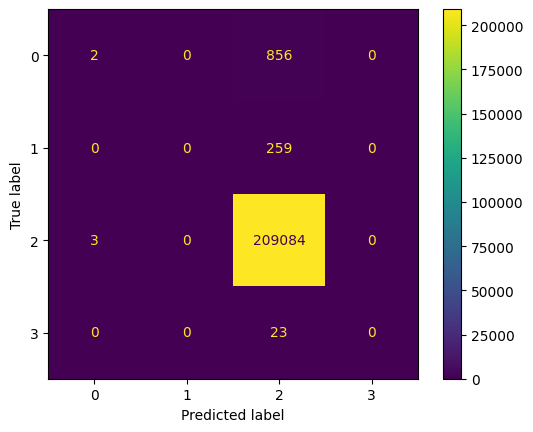

----------------------------DecisionTreeClassifier()--------------------------------
              precision    recall  f1-score   support

           0       0.02      0.03      0.03       858
           1       0.01      0.02      0.01       259
           2       0.99      0.99      0.99    209087
           3       0.00      0.00      0.00        23

    accuracy                           0.99    210227
   macro avg       0.26      0.26      0.26    210227
weighted avg       0.99      0.99      0.99    210227



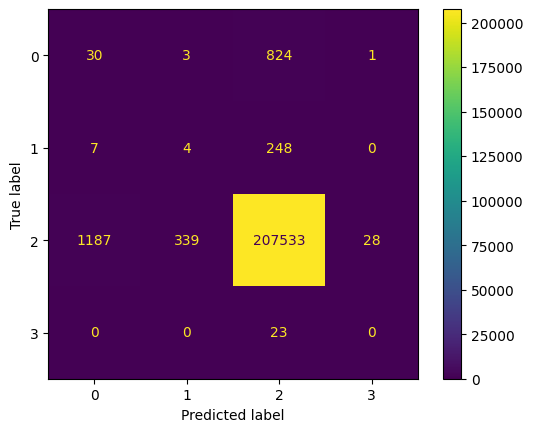

----------------------------RandomForestClassifier(random_state=1)--------------------------------
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       858
           1       1.00      0.00      0.01       259
           2       0.99      1.00      1.00    209087
           3       0.00      0.00      0.00        23

    accuracy                           0.99    210227
   macro avg       0.58      0.25      0.25    210227
weighted avg       0.99      0.99      0.99    210227



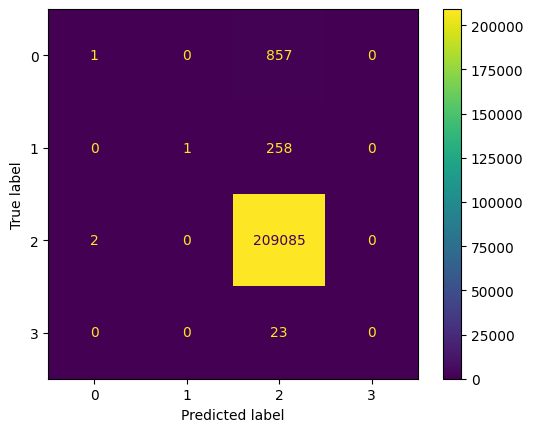

----------------------------AdaBoostClassifier(random_state=1)--------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       858
           1       0.00      0.00      0.00       259
           2       0.99      1.00      1.00    209087
           3       0.00      0.00      0.00        23

    accuracy                           0.99    210227
   macro avg       0.25      0.25      0.25    210227
weighted avg       0.99      0.99      0.99    210227



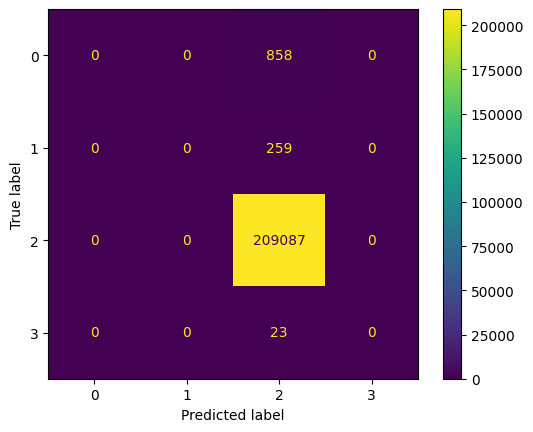

----------------------------GradientBoostingClassifier(random_state=1)--------------------------------
              precision    recall  f1-score   support

           0       0.04      0.00      0.00       858
           1       0.00      0.00      0.00       259
           2       0.99      1.00      1.00    209087
           3       0.00      0.00      0.00        23

    accuracy                           0.99    210227
   macro avg       0.26      0.25      0.25    210227
weighted avg       0.99      0.99      0.99    210227



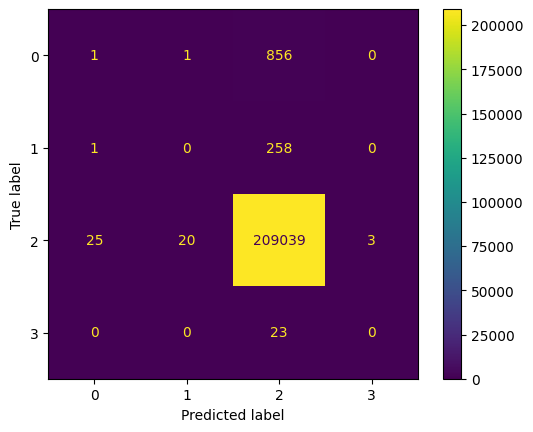

----------------------------XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)--------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       858
           1       0.00      0.00      0.00       259
          

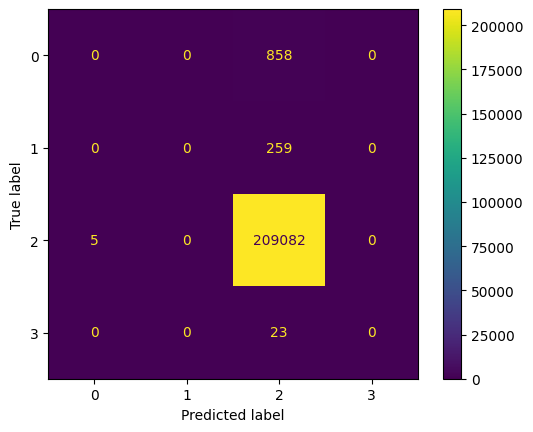

In [5]:
mod = [knn,dt,rf,ada,gb,xgb]
for i in mod:
  print(f"----------------------------{i}--------------------------------")
  y_pred = i.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  plt.show()


In [ ]:
print("OVERSAMPLING THE DATASET")
os = SMOTE(random_state=1)
X_os,y_os = os.fit_resample(X_scaled,y)

from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_os,y_os,test_size=0.3,random_state=1)

knn1 = KNeighborsClassifier()
knn1.fit(X_train1,y_train1)
print('knn fitted')
dt1 = DecisionTreeClassifier()
dt1.fit(X_train1,y_train1)
print('dt fitted')
rf1 = RandomForestClassifier(random_state=1)
rf1.fit(X_train1,y_train1)
print('rf fitted')
ada1 = AdaBoostClassifier(random_state=1)
ada1.fit(X_train1,y_train1)
print('ada fitted')
gb1 = GradientBoostingClassifier(random_state=1)
gb1.fit(X_train1,y_train1)
print('gb fitted')
xgb1 = XGBClassifier(random_state=1)
xgb1.fit(X_train1,y_train1)
print()
print('xgb fitted')

OVERSAMPLING THE DATASET
knn fitted
dt fitted
rf fitted
ada fitted
gb fitted

xgb fitted


----------------------------KNeighborsClassifier()--------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    209025
           1       0.98      1.00      0.99    209308
           2       1.00      0.91      0.95    208568
           3       1.00      1.00      1.00    209520

    accuracy                           0.98    836421
   macro avg       0.98      0.98      0.98    836421
weighted avg       0.98      0.98      0.98    836421



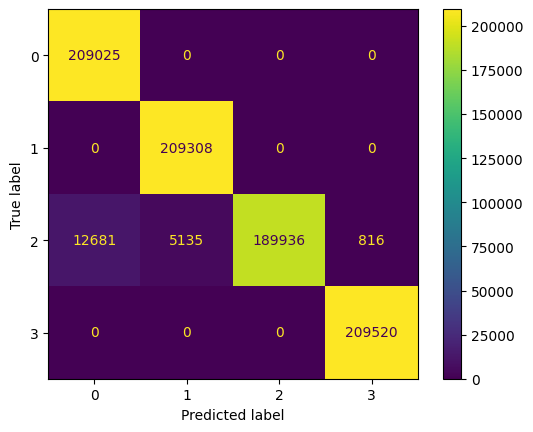

----------------------------DecisionTreeClassifier()--------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    209025
           1       0.99      1.00      0.99    209308
           2       0.99      0.97      0.98    208568
           3       1.00      1.00      1.00    209520

    accuracy                           0.99    836421
   macro avg       0.99      0.99      0.99    836421
weighted avg       0.99      0.99      0.99    836421



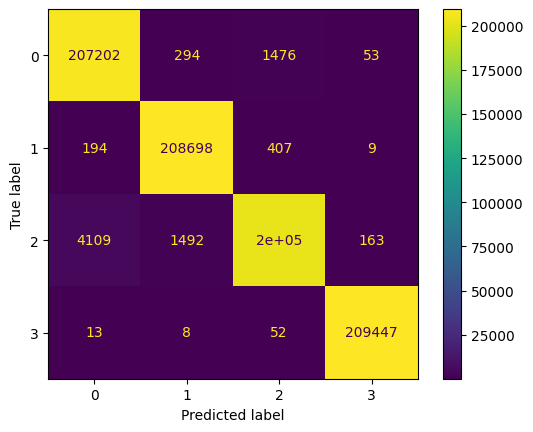

----------------------------RandomForestClassifier(random_state=1)--------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209025
           1       1.00      1.00      1.00    209308
           2       1.00      1.00      1.00    208568
           3       1.00      1.00      1.00    209520

    accuracy                           1.00    836421
   macro avg       1.00      1.00      1.00    836421
weighted avg       1.00      1.00      1.00    836421



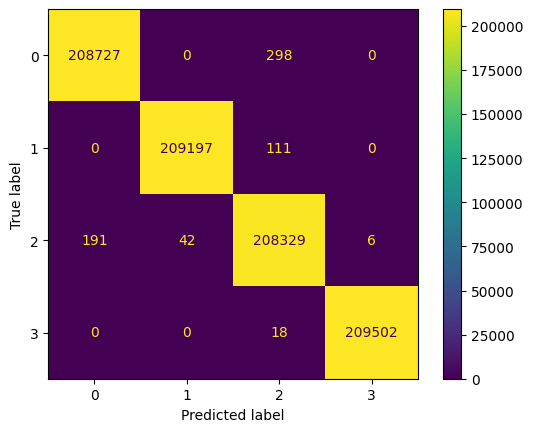

----------------------------AdaBoostClassifier(random_state=1)--------------------------------
              precision    recall  f1-score   support

           0       0.39      0.44      0.41    209025
           1       0.44      0.27      0.34    209308
           2       0.75      0.73      0.74    208568
           3       0.52      0.67      0.59    209520

    accuracy                           0.53    836421
   macro avg       0.53      0.53      0.52    836421
weighted avg       0.53      0.53      0.52    836421



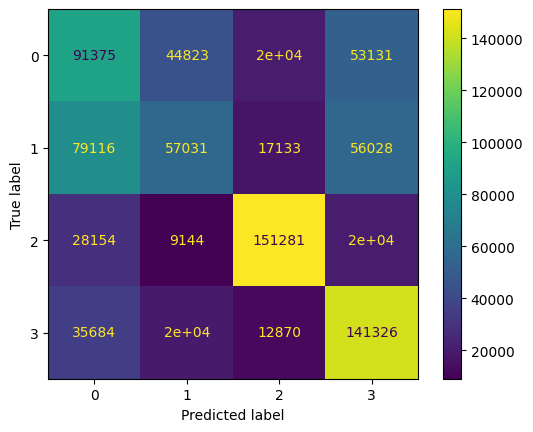

----------------------------GradientBoostingClassifier(random_state=1)--------------------------------
              precision    recall  f1-score   support

           0       0.62      0.52      0.56    209025
           1       0.66      0.56      0.61    209308
           2       0.82      0.90      0.86    208568
           3       0.75      0.90      0.82    209520

    accuracy                           0.72    836421
   macro avg       0.71      0.72      0.71    836421
weighted avg       0.71      0.72      0.71    836421



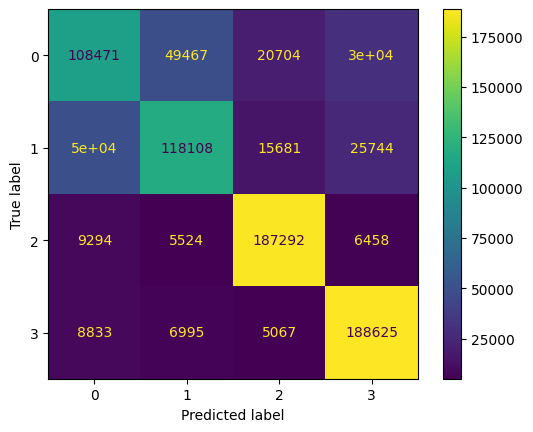

----------------------------XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)--------------------------------
              precision    recall  f1-score   support

           0       0.95      0.90      0.92    209025
           1       0.94      0.94      0.94    209308
          

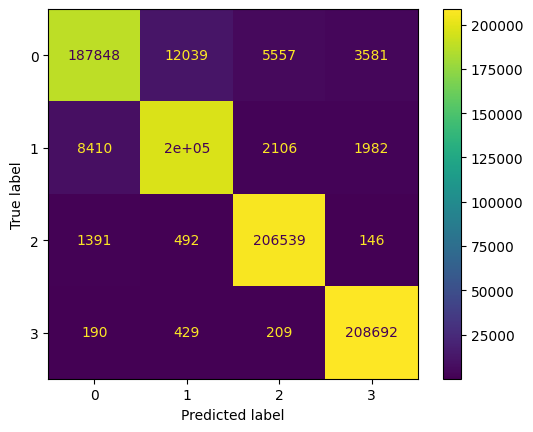

In [7]:
mod = [knn1,dt1,rf1,ada1,gb1,xgb1]
for i in mod:
  print(f"----------------------------{i}--------------------------------")
  y_pred1 = i.predict(X_test1)
  print(classification_report(y_test1,y_pred1))
  print(ConfusionMatrixDisplay.from_predictions(y_test1,y_pred1))
  plt.show()

In [8]:
pickle.dump(gb1,open('model_final2.sav','wb'))
pickle.dump(scaler,open('scaler_final2.sav','wb'))